## Food Recommender System

In [ ]:
!pwd

In [1]:
import pandas as pd


file_path = "~/code/Alanoudis/food-delivery-rec/data/raw_data/orders_sg100k.txt"
orders = pd.read_csv(file_path,index_col=0, sep=',', encoding='utf-8')

orders.head()

,customer_id,geohash,order_id,vendor_id,product_id,day_of_week,order_time,order_day
0,1ba124d4e5,w21z7,0,212753d2,783e85338f1c,0,12:03:29,85 days
1,1ba124d4e5,w21z7,0,212753d2,084ab73246e6,0,12:03:29,85 days
2,1ba124d4e5,w21z7,0,212753d2,30eba3cc2676,0,12:03:29,85 days
3,1ba124d4e5,w21z7,0,212753d2,3910309eea60,0,12:03:29,85 days
4,1ba124d4e5,w21z7,0,212753d2,20049fb602cb,0,12:03:29,85 days


In [2]:
orders['order_id']

0             0
1             0
2             0
3             0
4             0
          ...  
99996     49026
99997     49026
99998     49027
99999     49027
100000    49028
Name: order_id, Length: 100001, dtype: int64

In [3]:
orders.shape

(100001, 8)

## Clean the Data
### Remove Unnecessary Columns

In [4]:
orders.head(3)

,customer_id,geohash,order_id,vendor_id,product_id,day_of_week,order_time,order_day
0,1ba124d4e5,w21z7,0,212753d2,783e85338f1c,0,12:03:29,85 days
1,1ba124d4e5,w21z7,0,212753d2,084ab73246e6,0,12:03:29,85 days
2,1ba124d4e5,w21z7,0,212753d2,30eba3cc2676,0,12:03:29,85 days


In [5]:

file_path2 = "~/code/Alanoudis/food-delivery-rec/data/raw_data/products_sg.txt"
products = pd.read_csv(file_path2)

products.head()

,Unnamed: 0,vendor_id,product_id,name,unit_price
0,0,15bbf316,59099e089514,Meat & Seafood Combo 海鲜套餐,0.0036
1,1,e7b24dc0,52e1017fdbd9,Sausage Egg McMuffin® Meal,0.0024
2,2,e7b24dc0,fcb7110cd932,Scrambled Egg Burger w Chicken Meal,0.0024
3,3,7112a20b,d3e7708c2bc9,Maguro Sushi,0.0012
4,4,6137ef21,bf0d5ac0e03c,Family Meal - Prosp Chic TwLEVMx2 + ChBurgerHM,0.0100


In [6]:
products.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
products.head(3)

,vendor_id,product_id,name,unit_price
0,15bbf316,59099e089514,Meat & Seafood Combo 海鲜套餐,0.0036
1,e7b24dc0,52e1017fdbd9,Sausage Egg McMuffin® Meal,0.0024
2,e7b24dc0,fcb7110cd932,Scrambled Egg Burger w Chicken Meal,0.0024


In [8]:

file_path3 = "~/code/Alanoudis/food-delivery-rec/data/raw_data/vendors_sg.txt"
vendors = pd.read_csv(file_path3)

vendors.head()

,Unnamed: 0,vendor_id,chain_id,geohash,primary_cuisine
0,0,b160c319,d2786168,w21z6,mexican
1,1,9c8f010e,d2786168,w21ze,mexican
2,4,03eb25e1,5055ab25,w21ze,bak kut teh
3,5,3613129a,8984acb6,w23b1,italian
4,7,0946c9e5,1e3a2913,w21z4,bak kut teh


In [9]:
vendors.drop(columns=['Unnamed: 0'], inplace=True)

In [10]:
vendors.head(3)

,vendor_id,chain_id,geohash,primary_cuisine
0,b160c319,d2786168,w21z6,mexican
1,9c8f010e,d2786168,w21ze,mexican
2,03eb25e1,5055ab25,w21ze,bak kut teh


In [11]:

# Step 1: Merge orders with products on vendor_id and product_id
orders_products = orders.merge(products, on=['vendor_id', 'product_id'], how='left')

# Step 2: Merge the result with vendors on vendor_id
full_data = orders_products.merge(vendors, on='vendor_id', how='left')

# Preview the final merged dataset
full_data.head()

,customer_id,geohash_x,order_id,vendor_id,product_id,day_of_week,order_time,order_day,name,unit_price,chain_id,geohash_y,primary_cuisine
0,1ba124d4e5,w21z7,0,212753d2,783e85338f1c,0,12:03:29,85 days,201. Japanese Garlic Karaage Don,0.0060,66c9978d,w21z7,ramen
1,1ba124d4e5,w21z7,0,212753d2,084ab73246e6,0,12:03:29,85 days,204. Chicken Cutlet Don,0.0068,66c9978d,w21z7,ramen
2,1ba124d4e5,w21z7,0,212753d2,30eba3cc2676,0,12:03:29,85 days,206. Beef Sukiyaki Don,0.0068,66c9978d,w21z7,ramen
3,1ba124d4e5,w21z7,0,212753d2,3910309eea60,0,12:03:29,85 days,209. Japanese Beef Yakiniku Don,0.0068,66c9978d,w21z7,ramen
4,1ba124d4e5,w21z7,0,212753d2,20049fb602cb,0,12:03:29,85 days,210. Teriyaki Salmon Don,0.0080,66c9978d,w21z7,ramen


## fill NaN in chain_id

In [12]:
# full_data = full_data.dropna(subset=['chain_id'])
# full_data.shape

In [13]:
full_data.isnull().sum()

customer_id            0
geohash_x              0
order_id               0
vendor_id              0
product_id             0
day_of_week            0
order_time             0
order_day              0
name                   1
unit_price             1
chain_id           14827
geohash_y              0
primary_cuisine        0
dtype: int64

In [14]:
n_nan = full_data['chain_id'].isna().sum()
ratio_nan = n_nan / len(full_data)
print('NaN count:', n_nan, ' | ratio:', f'{ratio_nan:.2%}')

# عيّنة سريعة للمراجعة
display(full_data[full_data['chain_id'].isna()].head(10))


NaN count: 14827  | ratio: 14.83%


,customer_id,geohash_x,order_id,vendor_id,product_id,day_of_week,order_time,order_day,name,unit_price,chain_id,geohash_y,primary_cuisine
5,f374c8c54c,w21zt,1,21830106,f245bdf79350,4,19:03:03,61 days,Chicken Cutlet with Rice,0.0020,NaN,w21zt,western
6,f374c8c54c,w21zt,1,21830106,146127be77d4,4,19:03:03,61 days,Chicken Chop,0.0028,NaN,w21zt,western
7,f374c8c54c,w21zt,1,21830106,6c108c0fb2b9,4,19:03:03,61 days,Chicken Wings with Rice,0.0016,NaN,w21zt,western
8,f374c8c54c,w21zt,1,21830106,da422c7836e1,4,19:03:03,61 days,Saba Fish with Rice,0.0024,NaN,w21zt,western
9,f374c8c54c,w21zt,1,21830106,01110c80a0fa,4,19:03:03,61 days,Chicken Chop with Rice,0.0020,NaN,w21zt,western
10,f374c8c54c,w21zt,1,21830106,5289a6f50a7b,4,19:03:03,61 days,Tomato Sauce Spaghetti,0.0020,NaN,w21zt,western
11,f374c8c54c,w21zt,1,21830106,64a268be5f2e,4,19:03:03,61 days,Grilled Fish,0.0036,NaN,w21zt,western
12,f374c8c54c,w21zt,1,21830106,adf53ab3befe,4,19:03:03,61 days,Fish & Chips,0.0028,NaN,w21zt,western
13,2e7276ad3a,w21z6,2,ee4f2ee0,2c349859aa69,0,18:08:42,8 days,V7. Beef Noodle Soup,0.0040,NaN,w21z7,vietnamese
14,2e7276ad3a,w21z6,2,ee4f2ee0,a3e4aac0520d,0,18:08:42,8 days,V12. Summer Rolls,0.0040,NaN,w21z7,vietnamese


In [15]:
# ننسخ البيانات عشان نشتغل عليها
df = full_data.copy()

# (أ) نبني mapping من vendor_id -> chain_id المعروف (نأخذ الـ mode في حال التكرار)
known = df.dropna(subset=['chain_id'])
vendor_to_chain = (
    known.groupby('vendor_id')['chain_id']
         .agg(lambda s: s.mode().iloc[0])  # الأكثر تكرارًا لضبط أي ضجيج
)

# (ب) نملأ القيم الناقصة من هذا الـ mapping
df['chain_id_filled'] = df['chain_id'].copy()
df['chain_id_filled'] = df['chain_id_filled'].fillna(df['vendor_id'].map(vendor_to_chain))

# (ج) ما بقي NaN بعد الخطوة السابقة نعتبره stand-alone -> chain_id = vendor_id
solo_mask = df['chain_id_filled'].isna()
df.loc[solo_mask, 'chain_id_filled'] = df.loc[solo_mask, 'vendor_id']
df['standalone_assumption'] = solo_mask  # عشان نعرف مين اتعبّى بهذه الفرضية


In [16]:
# يجب أن يكون لكل vendor_id قيمة chain_id واحدة بعد التعبئة
per_vendor_unique = df.groupby('vendor_id')['chain_id_filled'].nunique()
violations = per_vendor_unique[per_vendor_unique > 1]
print('Vendors with >1 chain_id after filling:', len(violations))

# إحصائية بسيطة: كم سلسلة لها أكثر من فرع، وكم stand-alone
branches_per_chain = df.groupby('chain_id_filled')['vendor_id'].nunique()
print('Chains with multiple branches:', (branches_per_chain > 1).sum())
print('Stand-alone vendors (filled as vendor_id):', df['standalone_assumption'].sum())


Vendors with >1 chain_id after filling: 0
Chains with multiple branches: 670
Stand-alone vendors (filled as vendor_id): 14827


In [17]:
full_data['chain_id'] = df['chain_id_filled']

In [19]:
full_data.isna().sum()

customer_id        0
geohash_x          0
order_id           0
vendor_id          0
product_id         0
day_of_week        0
order_time         0
order_day          0
name               1
unit_price         1
chain_id           0
geohash_y          0
primary_cuisine    0
dtype: int64

### 🗺️ Geohash Distribution

<Axes: title={'center': 'Top Geohash Areas'}, xlabel='geohash'>

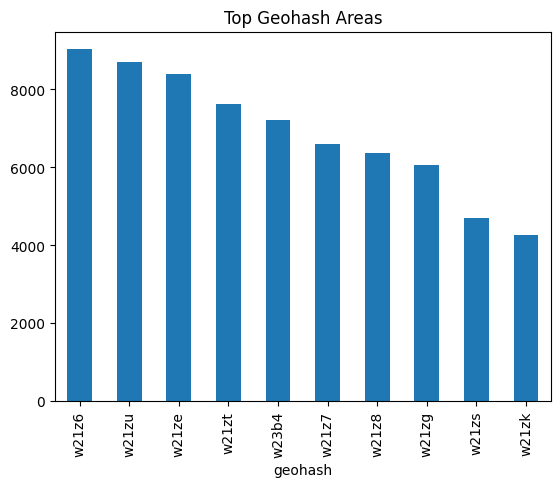

In [20]:
orders['geohash'].value_counts().head(10).plot(kind='bar', title='Top Geohash Areas')

# add rate based on vendor  

# 🎯 Logical Approach Explained (Friendly Version)

Let me break down the logic I used to create realistic vendor ratings, like I'm explaining it to a friend over coffee! ☕

---

## **The Big Idea**

Think of it like **Yelp or Google Reviews** - not all vendors are rated the same, and ratings depend on multiple factors. I'm simulating how real customers would rate vendors.

---

## **Step-by-Step Logic**

### **Step 1: Map Cuisines to Origins** 🍜
- You have specific cuisines like "ramen", "sushi", "dim sum"
- I group them into broader categories: "japanese", "chinese", etc.
- **Why?** Makes it easier to apply realistic rating patterns by cuisine type

---

### **Step 2: Analyze Each Vendor** 📊

For each vendor, I calculate:
- **How many orders they've received** (popularity)
- **How many different customers** (customer base)
- **Average price** (are they budget or premium?)
- **What cuisine they serve**

**Logic:** Popular vendors with many repeat customers are usually better quality → deserve higher base ratings

---

### **Step 3: Assign Base Rating (3.5 to 4.8)** ⭐

I give each vendor a starting rating based on:
- **30% from order volume** - More orders = people like them
- **20% from customer count** - More unique customers = good reputation
- **80% random quality factor** - Some vendors are just naturally better!

**Why 3.5 to 4.8?**
- Below 3.5 = vendor would probably go out of business
- Perfect 5.0 = unrealistic (even great places have occasional bad days)

---

### **Step 4: Adjust by Cuisine Type** 🌍

Different cuisines have different expectations:

**Premium cuisines** (get boost):
- Japanese (+0.25) - High quality expectations, fresh ingredients
- French (+0.25) - Fine dining reputation
- Singaporean (+0.20) - Local pride, comfort food
- Italian (+0.20) - Popular, reliable

**Standard cuisines** (smaller boost):
- Chinese (+0.10)
- Thai (+0.15)
- Vietnamese (+0.15)

**Casual cuisines** (minimal boost):
- American/Fast food (+0.05) - Lower expectations

**Why this matters?** In real life, people expect more from a Japanese restaurant than a burger joint, so they rate accordingly.

---

### **Step 5: Determine Consistency Level** 📈

I group vendors into three consistency tiers:

| Order Volume | Consistency | What This Means |
|--------------|-------------|-----------------|
| **< 20 orders** | LOW | New/unpredictable - ratings swing wildly (2.5 to 5.0) |
| **20-100 orders** | MEDIUM | Established - ratings more stable (3.5 to 4.5) |
| **> 100 orders** | HIGH | Very popular - consistent quality (4.0 to 4.8) |

**Real-world logic:** 
- New restaurant = hit or miss (some amazing days, some disasters)
- Busy restaurant = they've figured it out (consistent quality)

**Bonus:** Chain restaurants automatically get "HIGH" consistency (McDonald's tastes the same everywhere!)

---

### **Step 6: Generate Individual Ratings** 🎲

Here's the magic part! Even good vendors don't get 5 stars every time.

For each order, I:
1. Take the vendor's **base rating** (e.g., 4.3)
2. Add some **randomness** based on consistency:
   - High consistency: ±0.3 stars (tight range)
   - Medium consistency: ±0.5 stars
   - Low consistency: ±0.8 stars (all over the place)
3. Round to nearest **half-star** (1.0, 1.5, 2.0, etc.)
4. Keep it between 1.0 and 5.0

**Example:**
- Vendor base rating: 4.4
- High consistency: ratings will be mostly 4.0, 4.5, 5.0
- Low consistency: could be anywhere from 3.0 to 5.0

---

## **Why This Approach is Realistic** ✅

### 1️⃣ **Popular = Better Rated**
Just like real life - busy restaurants are usually busy for a reason!

### 2️⃣ **Cuisine Matters**
You judge a sushi place differently than a burger joint. Expectations shape ratings.

### 3️⃣ **Not All Orders Are Perfect**
Even the best vendor has off days - maybe your food was cold, delivery was slow, etc.

### 4️⃣ **Established Vendors Are Consistent**
New places are unpredictable. Established places have their systems down.

### 5️⃣ **Chains Are Predictable**
Whether you love or hate McDonald's, you know exactly what you're getting.

---

## **Real-World Example** 🍕

**Vendor A:** New pizza place (15 orders)
- Base rating: 3.8
- Low consistency
- Individual ratings: 2.5, 5.0, 3.5, 4.0, 2.0, 5.0 (all over!)
- **Average: 3.7** ⭐

**Vendor B:** Popular Japanese chain (250 orders)
- Base rating: 4.5
- High consistency
- Individual ratings: 4.5, 4.5, 5.0, 4.0, 4.5, 4.5 (stable!)
- **Average: 4.5** ⭐⭐⭐⭐

---

## **Summary in One Sentence**

> *"I calculated how good each vendor should be based on their popularity and cuisine type, then added realistic variation so not every order gets the exact same rating - just like real food delivery apps!"*


In [21]:
import numpy as np
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)

# Your cuisine mapping
global_cuisine_category = {
    "japanese": "japanese", "ramen": "japanese", "sushi": "japanese",
    "chinese": "chinese", "dim sum": "chinese", "mala xiang guo": "chinese",
    "mala soups": "chinese", "hokkien mee": "chinese", "noodles": "chinese", "tea": "chinese",
    "indian": "indian", "curry": "indian",
    "thai": "thai",
    "vietnamese": "vietnamese", "pho": "vietnamese",
    "singaporean": "singaporean", "chicken rice": "singaporean",
    "ban mian": "singaporean", "yong tau foo": "singaporean",
    "indonesian": "indonesian", "ayam penyet": "indonesian",
    "malaysian": "malaysian", "nasi lemak": "malaysian", "roti prata": "malaysian",
    "american": "american", "burgers": "american", "sandwiches": "american",
    "grill": "american", "fries": "american", "fast food": "american",
    "italian": "italian", "pizza": "italian", "pasta": "italian",
    "french": "french", "german": "german", "spanish": "spanish",
    "mexican": "mexican", "turkish": "turkish", "lebanese": "lebanese",
    "rice dishes": "asian", "fried rice": "asian", "porridge": "asian",
}

# Map cuisine to cuisine_origin
full_data['cuisine_origin'] = full_data['primary_cuisine'].str.strip().map(global_cuisine_category)
full_data['cuisine_origin'].fillna('snacks', inplace=True)
# Step 1: Calculate vendor-level statistics
vendor_stats = full_data.groupby('vendor_id').agg({
    'order_id': 'nunique',          # number of unique orders
    'customer_id': 'nunique',       # number of unique customers
    'unit_price': 'mean',           # average price
    'cuisine_origin': lambda x: x.mode()[0] if len(x) > 0 else 'other'
}).reset_index()

vendor_stats.columns = ['vendor_id', 'total_orders', 'unique_customers', 'avg_price', 'cuisine_origin']

# Step 2: Assign base rating (3.5 to 4.8) based on popularity
vendor_stats['base_rating'] = 3.5 + (
    0.3 * (vendor_stats['total_orders'] / vendor_stats['total_orders'].max()) +
    0.2 * (vendor_stats['unique_customers'] / vendor_stats['unique_customers'].max()) +
    0.8 * np.random.random(len(vendor_stats))
)

vendor_stats['base_rating'] = vendor_stats['base_rating'].clip(upper=4.8)

# Step 3: Cuisine-based rating adjustments (Asian market context)
cuisine_boost = {
    # Premium Asian cuisines (high expectations)
    'japanese': 0.25,
    'singaporean': 0.20,  # Local favorite
    'vietnamese': 0.15,
    'thai': 0.15,

    # Standard Asian cuisines
    'chinese': 0.10,
    'malaysian': 0.10,
    'indonesian': 0.10,
    'asian': 0.05,

    # Indian (variable quality perception)
    'indian': 0.05,

    # Western cuisines (premium in Asian markets)
    'italian': 0.20,
    'french': 0.25,
    'spanish': 0.15,
    'mexican': 0.10,

    # American (casual dining)
    'american': 0.05,

    # Middle Eastern
    'turkish': 0.10,
    'lebanese': 0.10,

    # European
    'german': 0.10,

    # Default
    'other': 0.0
}

vendor_stats['cuisine_adjustment'] = vendor_stats['cuisine_origin'].map(cuisine_boost).fillna(0)
vendor_stats['base_rating'] = (vendor_stats['base_rating'] + vendor_stats['cuisine_adjustment']).clip(3.0, 5.0)

# Step 4: Assign consistency based on order volume
# High volume vendors = more consistent (less variance in ratings)
vendor_stats['consistency'] = pd.cut(
    vendor_stats['total_orders'],
    bins=[0, 20, 100, np.inf],
    labels=['low', 'medium', 'high']
)

# Step 5: Chain vendors get higher consistency
if 'chain_id' in full_data.columns:
    chain_vendors = full_data[full_data['chain_id'].notna()]['vendor_id'].unique()
    vendor_stats.loc[vendor_stats['vendor_id'].isin(chain_vendors), 'consistency'] = 'high'

# Step 6: Generate rating function
def generate_vendor_rating(base_rating, consistency='medium'):
    """Generate realistic individual rating"""
    consistency_map = {'high': 0.3, 'medium': 0.5, 'low': 0.8}
    std_dev = consistency_map.get(consistency, 0.5)

    # Normal distribution around base rating
    rating = np.random.normal(base_rating, std_dev)

    # Round to nearest 0.5 (half-star system)
    rating = np.round(rating * 2) / 2

    # Clip to valid range
    return np.clip(rating, 1.0, 5.0)

# Step 7: Merge vendor stats back to main dataframe
full_data = full_data.merge(
    vendor_stats[['vendor_id', 'base_rating', 'consistency']],
    on='vendor_id',
    how='left'
)

# Step 8: Generate individual vendor ratings per row
full_data['vendor_rating'] = full_data.apply(
    lambda row: generate_vendor_rating(row['base_rating'], row['consistency']),
    axis=1
)

# Step 9: Create final table
full_data= full_data[[
    'customer_id', 'geohash_x', 'order_id', 'vendor_id', 'product_id',
    'day_of_week', 'order_time', 'order_day', 'name', 'unit_price',
    'chain_id', 'geohash_y', 'primary_cuisine', 'cuisine_origin', 'vendor_rating'
]].copy()


# Display vendor rating statistics
print("=" * 60)
print("VENDOR RATING STATISTICS BY CUISINE")
print("=" * 60)
print(full_data.groupby('cuisine_origin')['vendor_rating'].agg(['mean', 'std', 'count']).round(2))
print("\n")
print("=" * 60)
print("TOP 10 VENDORS BY AVERAGE RATING")
print("=" * 60)
top_vendors = full_data.groupby('vendor_id').agg({
    'vendor_rating': 'mean',
    'cuisine_origin': 'first',
    'order_id': 'nunique'
}).sort_values('vendor_rating', ascending=False).head(10)
top_vendors.round(2)

/tmp/ipykernel_163285/4128499876.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_data['cuisine_origin'].fillna('snacks', inplace=True)


VENDOR RATING STATISTICS BY CUISINE
                mean   std  count
cuisine_origin                   
american        4.04  0.41   5380
asian           4.09  0.40   4850
chinese         4.09  0.41  22162
french          4.19  0.42     18
german          3.70  0.33     43
indian          4.03  0.41   6567
indonesian      4.05  0.39   1349
italian         4.19  0.40   2924
japanese        4.25  0.41   6532
lebanese        4.25  0.35      2
malaysian       4.13  0.41   3318
mexican         4.00  0.41    204
singaporean     4.21  0.41   6620
snacks          4.00  0.41  36792
spanish         4.33  0.29      3
thai            4.18  0.41   2747
turkish         3.92  0.43     71
vietnamese      4.06  0.41    419


TOP 10 VENDORS BY AVERAGE RATING


,vendor_rating,cuisine_origin,order_id
vendor_id,,,
124f9548,5.0,japanese,1
d1fee7da,5.0,american,1
5b0f82e9,5.0,american,1
32239b75,5.0,chinese,1
b2115e68,5.0,snacks,1
a74eee0e,5.0,chinese,1
3060ae25,5.0,japanese,1
a472f3a3,5.0,asian,1
8abbe7ee,5.0,japanese,1


In [22]:
print(full_data[['primary_cuisine', 'cuisine_origin']].drop_duplicates().sort_values(by='primary_cuisine'))

     primary_cuisine cuisine_origin
3347       acai bowl         snacks
66          american       american
51             asian         snacks
170      ayam penyet     indonesian
2915     bak kut teh         snacks
...              ...            ...
92        vegetarian         snacks
13        vietnamese     vietnamese
5            western         snacks
5098           wraps         snacks
657     yong tau foo    singaporean

[77 rows x 2 columns]


In [28]:
full_data.isnull().sum()
# drop rows with any remaining NaN values (if any)
full_data = full_data.dropna()

**reduce the rows one row per each order**

In [29]:
# Aggregate data to order level
full_data = full_data.groupby(['customer_id', 'geohash_x', 'order_id', 'vendor_id']).agg({
    'day_of_week': 'first',
    'order_time': 'first',
    'order_day': 'first',
    'chain_id': 'first',
    'geohash_y': 'first',
    'primary_cuisine': 'first',
    'cuisine_origin': 'first',
    'vendor_rating': 'mean',  # Average rating across all products in the order
    'product_id': 'count',  # Number of items in order
    'unit_price': 'sum',  # Total order value
    'name': lambda x: ', '.join(x[:3]) + ('...' if len(x) > 3 else '')  # First 3 product names
}).reset_index()

# Rename columns for clarity
full_data.rename(columns={
    'product_id': 'num_items',
    'unit_price': 'total_order_value',
    'name': 'items_ordered',
    'vendor_rating': 'avg_vendor_rating'
}, inplace=True)

# Round ratings to 1 decimal
full_data['avg_vendor_rating'] = full_data['avg_vendor_rating'].round(1)

print(f"Original rows: {len(full_data)}")
print(f"Aggregated rows: {len(full_data)}")
print("\nSample of aggregated data:")
full_data.head()


Original rows: 49029
Aggregated rows: 49029

Sample of aggregated data:


,customer_id,geohash_x,order_id,vendor_id,day_of_week,order_time,order_day,chain_id,geohash_y,primary_cuisine,cuisine_origin,avg_vendor_rating,num_items,total_order_value,items_ordered
0,00119c8178,w21zu,39095,e7cb5902,2,16:30:07,10 days,ef3142e8,w21zu,malaysian,malaysian,3.5,1,0.0056,Seafood Fried Rice
1,00198e01e4,w21z6,35939,02acaff6,0,13:57:35,85 days,8c51e46b,w21z6,noodles,chinese,3.9,4,0.0080,"Bean Curd Skin 凉拌腐竹, Dried Beancurd 凉拌素鸡, Blac..."
2,001a5689fc,w21z3,48288,a2c60e71,0,20:10:35,78 days,dd69fe77,w21z3,singaporean,singaporean,4.5,1,0.0024,Carrot Cake (Melur)
3,001a5689fc,w21z3,48289,a3bc472c,4,20:50:40,40 days,c59edb7d,w21z9,fried chicken,snacks,4.0,1,0.0016,Served without Fries
4,001a5689fc,w21z3,48290,de18b671,3,20:05:42,53 days,f88ffd2b,w21z3,burgers,american,4.5,1,0.0040,WHOPPER® Meal


In [30]:
full_data['total_order_value'].describe()


count    49029.000000
mean         0.006904
std          0.005969
min          0.000000
25%          0.003200
50%          0.005200
75%          0.008400
max          0.171200
Name: total_order_value, dtype: float64

In [31]:
full_data['total_order_value'] = full_data['total_order_value'] * 1000


In [32]:
# Rename and drop columns
full_data = full_data.rename(columns={
    'geohash_x': 'customer_geohash',
    'geohash_y': 'vendor_geohash',
    'num_items': 'num_products',
    'items_ordered': 'products_ordered'
}).drop(columns=['primary_cuisine'])

# Verify changes
full_data.head()

,customer_id,customer_geohash,order_id,vendor_id,day_of_week,order_time,order_day,chain_id,vendor_geohash,cuisine_origin,avg_vendor_rating,num_products,total_order_value,products_ordered
0,00119c8178,w21zu,39095,e7cb5902,2,16:30:07,10 days,ef3142e8,w21zu,malaysian,3.5,1,5.6,Seafood Fried Rice
1,00198e01e4,w21z6,35939,02acaff6,0,13:57:35,85 days,8c51e46b,w21z6,chinese,3.9,4,8.0,"Bean Curd Skin 凉拌腐竹, Dried Beancurd 凉拌素鸡, Blac..."
2,001a5689fc,w21z3,48288,a2c60e71,0,20:10:35,78 days,dd69fe77,w21z3,singaporean,4.5,1,2.4,Carrot Cake (Melur)
3,001a5689fc,w21z3,48289,a3bc472c,4,20:50:40,40 days,c59edb7d,w21z9,snacks,4.0,1,1.6,Served without Fries
4,001a5689fc,w21z3,48290,de18b671,3,20:05:42,53 days,f88ffd2b,w21z3,american,4.5,1,4.0,WHOPPER® Meal


In [33]:
# Rename (make a copy) FULL DATA 2 IS FOR VENDOR RATINGS
full_data2 = full_data.copy()

# Export as CSV
full_data2.to_csv("full_data2.csv", index=False)

**show customer data**

In [ ]:
customer_id = "008ce71183"
customer_orders = full_data[
    (full_data['customer_id'] == customer_id)
]
customer_orders